In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as sps
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns
import sklearn.linear_model as slm
import sklearn

In [435]:
df = pd.read_csv('data/results.csv', usecols=['meters', 'price'], na_values=['Zapytajocenę'])

In [436]:
df.head(3)

,meters,price
0,70.0,699000.0
1,72.0,340000.0
2,30.8,219000.0


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 2 columns):
meters    2745 non-null float64
price     2587 non-null float64
dtypes: float64(2)
memory usage: 43.0 KB


In [438]:
vc = df.price.value_counts(bins=30) / len(df.price)
vc = vc[0:9]
vc

(259733.333, 357600.0]        0.358834
(357600.0, 455466.667]        0.226594
(161866.667, 259733.333]      0.184335
(455466.667, 553333.333]      0.081603
(553333.333, 651200.0]        0.037523
(651200.0, 749066.667]        0.019308
(61063.999, 161866.667]       0.012750
(749066.667, 846933.333]      0.012750
(1042666.667, 1140533.333]    0.002914
Name: price, dtype: float64

In [439]:
vc2 = df.meters.value_counts(bins=30) / len(df.price)
vc2[0:9]

(46.35, 78.2]                  0.587978
(13.543000000000001, 46.35]    0.259381
(78.2, 110.05]                 0.111475
(110.05, 141.9]                0.030237
(141.9, 173.75]                0.008015
(173.75, 205.6]                0.001821
(269.3, 301.15]                0.000364
(938.15, 970.0]                0.000364
(747.05, 778.9]                0.000364
Name: meters, dtype: float64

In [440]:
df = df.dropna()

In [441]:
df.describe()

,meters,price
count,2587.000000,2.587000e+03
mean,61.446107,3.619132e+05
std,32.667806,1.544157e+05
min,14.500000,6.400000e+04
25%,46.770000,2.700000e+05
50%,57.150000,3.382100e+05
75%,69.670000,4.000000e+05
max,970.000000,3.000000e+06


In [442]:
q = df["meters"].quantile(0.99)

In [443]:
df = df[df["meters"] < q]

In [444]:
q = df["price"].quantile(0.99)

In [445]:
df = df[df["price"] < q]

In [446]:
df.describe()

,meters,price
count,2532.000000,2532.000000
mean,59.276003,350134.076679
std,20.753949,117955.367759
min,14.500000,64000.000000
25%,46.510000,269000.000000
50%,56.780000,337000.000000
75%,69.000000,398000.000000
max,145.010000,790000.000000


<Figure size 432x288 with 0 Axes>

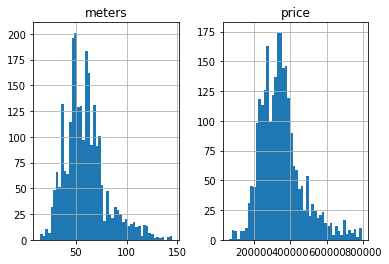

In [447]:
fig = plt.figure()
df.hist(bins=50)
plt.show()
#fig.savefig('distribution.pdf')

In [448]:
def shapiro_test(data):
    test = sps.shapiro(data)
    st, pv = test
    print("{} : Test Shapiro-Wilka. H0: kurtoza = 3 i skosnosc = 0, H1: kurtoza != 3 lub/i skosnosc !=0\n"
          "P-value wynosi:{}".format(data.name,round(pv, 5)))
    if pv > 0.05:
        return "Nie ma podstaw do odrzucenia hipotezy 0"
    if pv < 0.05:
        return "Odrzucono hipoteze 0 na rzecz hipotezy 1"

In [472]:
def plot_test(data, i=0):
    fig = plt.figure(i)
    m, s = sp.stats.norm.fit(data)
    plt.subplot(131)
    plt.axis([0, 150, 0, 1])
    ecdf = ECDF(data)
    plt.step(ecdf.x, ecdf.y, 'r-', label=r'$\hat{F}_n(x)$')

    t1 = np.linspace(0, 150, 100)
    t2 = sp.stats.norm.cdf(t1, loc=m, scale=s)
    t3 = sp.stats.norm.pdf(t1, loc=m, scale=s)
    plt.plot(t1, t2, 'b--', label=r'$\mathrm{N}(%.2f, %.2f)$' % (m, s))
    plt.legend(loc='best')

    plt.subplot(132)
    sns.distplot(data, bins=8, color='k')
    plt.plot(t1, t3, 'g--')

    plt.subplot(133)
    sp.stats.probplot(data, dist=sp.stats.norm, plot=plt)
    plt.show()
    fig.savefig('normal_distribution_test.pdf')

In [473]:
shapiro_test(df.meters)

meters : Test Shapiro-Wilka. H0: kurtoza = 3 i skosnosc = 0, H1: kurtoza != 3 lub/i skosnosc !=0
P-value wynosi:0.0


'Odrzucono hipoteze 0 na rzecz hipotezy 1'

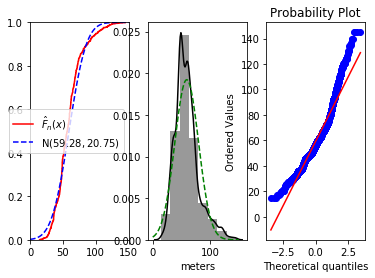

In [474]:
plot_test(df.meters)

In [452]:
shapiro_test(df.price)

price : Test Shapiro-Wilka. H0: kurtoza = 3 i skosnosc = 0, H1: kurtoza != 3 lub/i skosnosc !=0
P-value wynosi:0.0


'Odrzucono hipoteze 0 na rzecz hipotezy 1'

In [467]:
def plot_test(data, i=0):
    fig = plt.figure(i)
    m, s = sp.stats.norm.fit(data)
    plt.subplot(131)
    plt.axis([0, 1200000, 0, 1])
    ecdf = ECDF(data)
    plt.step(ecdf.x, ecdf.y, 'r-', label=r'$\hat{F}_n(x)$')

    t1 = np.linspace(0, 1200000, 10000)
    t2 = sp.stats.norm.cdf(t1, loc=m, scale=s)
    t3 = sp.stats.norm.pdf(t1, loc=m, scale=s)
    plt.plot(t1, t2, 'b--', label=r'$\mathrm{N}(%.2f, %.2f)$' % (m, s))
    plt.legend(loc='best')

    plt.subplot(132)
    sns.distplot(data, bins=8, color='k')
    plt.plot(t1, t3, 'g--')

    plt.subplot(133)
    sp.stats.probplot(data, dist=sp.stats.norm, plot=plt)
    plt.show()
    fig.savefig('normal_distribution_test.pdf')

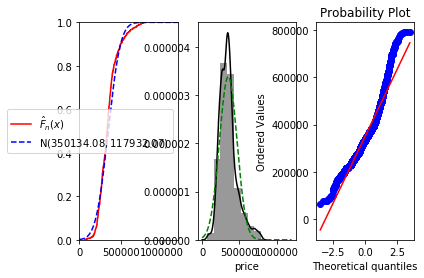

In [468]:
plot_test(df.price)

In [455]:
x_axis = np.array([df.price]).reshape(-1, 1)
y_axis = np.array(df.meters.tolist())


regresja = slm.LinearRegression()

regresja.fit(x_axis, y_axis)

regresja = slm.LinearRegression()

regresja.fit(x_axis, y_axis)
print('Wyraz wolny jest równy: %s' % np.round(regresja.intercept_, 30))
print('Współczynnik kierunkowy wynosi: %s' % np.round(regresja.coef_, 30))
print('Współczynnik dopasowania wynosi: %s' % np.round(regresja.score(x_axis, y_axis),30))



Wyraz wolny jest równy: 7.763265904047543
Współczynnik kierunkowy wynosi: [0.00014712]
Współczynnik dopasowania wynosi: 0.699188766724465


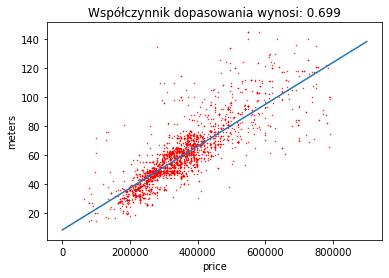

In [456]:
P = np.array([0.0001447 * x + 8.360059306962654 for x in np.linspace(1, 900000, 10000)])

fig = plt.figure()
plt.scatter(x_axis, y_axis, c='r', s=0.2)
plt.plot(np.linspace(1, 900000, 10000), P)
plt.xlabel('price')
plt.ylabel('meters')
plt.title('Współczynnik dopasowania wynosi: 0.699')
fig.savefig('linear_regression.pdf')
plt.show()

In [457]:
X_new = [[800000]]

In [458]:
model = regresja.predict(X_new)
print("Za kwotę {} mieszkanie ma {} m2".format(X_new[0][0], round(model[0], 2)))

Za kwotę 800000 mieszkanie ma 125.46 m2
